## 1. Import libraries for linear regression example

In [5]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

## 2. Functions to execute regression

In [6]:
def read_split_data():
    #read data
    df = pd.read_csv("ex1data1.txt", header=None)

    #split the data
    X_train, X_test, y_train, y_test = train_test_split(df[0].values.reshape(-1,1), df[1].values.reshape(-1,1), test_size=0.33)
    
    return X_train, X_test, y_train, y_test

def plot_data():
    df = pd.read_csv("ex1data1.txt", header=None)
    # Plot outputs
    plt.scatter(df[0], df[1],  color='black')

    plt.show()

def regr_fit(regr, X_train, X_test, y_train, y_test):

    # fit model
    regr.fit(X_train, y_train)
    
def regr_predict(regr, X_test):
    
    # predit test set
    y_pred = regr.predict(X_test)
    
    return y_pred

def print_result(y_test,y_pred):
    # coef
    print('Coefficients: \n', regr.coef_)
    # The mean squared error
    print("Mean squared error: %.2f"
          % mean_squared_error(y_test, y_pred))
    # Explained variance score: 1 is perfect prediction
    print('Variance score: %.2f' % r2_score(y_test, y_pred))
    
    return mean_squared_error(y_test, y_pred)
    
def plot_result(X_test, y_test, y_pred):
    # Plot outputs
    plt.scatter(X_test, y_test,  color='black')
    plt.plot(X_test, y_pred, color='blue', linewidth=3)

    plt.show()
    
def plot_final(epochs, mean_squared):
    
    plt.plot(epochs, mean_squared,  color='black')
    plt.show()
    
def print_resume(result_scores):
    #reduce(lambda x: x+x , result_scores)
    print('Average Variance: ', sum(result_scores) / len(result_scores))
    print('Minor Variance: ', min(result_scores))
    print('Major Variance: ', max(result_scores))
    

## 3. Execute Regression

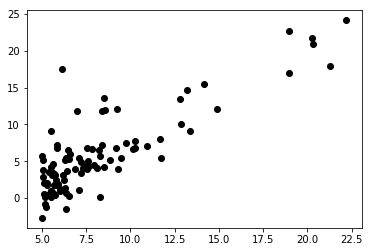

In [30]:
result_scores = []
plot_data()
# regression from sklearn
#regr = linear_model.SGDRegressor(alpha= 0.001, n_iter=1000)
#X_train, X_test, y_train, y_test = read_split_data()
#regr.fit(X_train,y_train)
#y_pred = regr.predict(X_test)
#print(mean_squared_error(y_test, y_pred))
#for i in range(1000):
    #print('-----------Execution-----------')
    #regr.fit(X_train,y_train)
    #y_pred = regr.predict(X_test)
    #print(regr.coef_)
    #print('------------------')
    #result_scores.append(mean_squared_error(y_test, y_pred) )
    #plot_result(X_test, y_test, y_pred)
    
#plot_final(range(1000), result_scores)
    

/Users/lucasvasconcelos/miniconda3/envs/envML/lib/python3.6/site-packages/sklearn/utils/validation.py:547: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


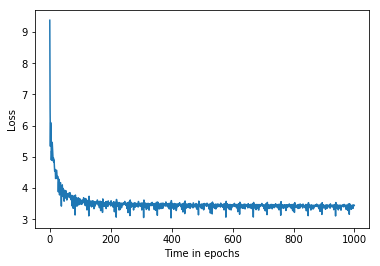

In [32]:
import sys
from io import StringIO
old_stdout = sys.stdout
sys.stdout = mystdout = StringIO()
X_train, X_test, y_train, y_test = read_split_data()
regr = linear_model.SGDRegressor(alpha=0, max_iter=1000, verbose=1)
regr.fit(X_train,y_train)
sys.stdout = old_stdout
loss_history = mystdout.getvalue()
print(loss_history)
loss_list = []
for line in loss_history.split('\n'):
    if(len(line.split("loss: ")) == 1):
        continue
    loss_list.append(float(line.split("loss: ")[-1]))
plt.plot(np.arange(len(loss_list)), loss_list)
plt.xlabel("Time in epochs")
plt.ylabel("Loss")
plt.show()